## K nearest neighbors with cross validation

* You have been given a classified dataset from a company. They have hidden the
feature column names but have given you the data and the target classes.
* We will try to use KNN to crete a model thet directly predict a class for a 
 new data point based off of the features.

#### Import Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### get the data
 Set index_col=0 to use the first column as the index.

In [2]:
df=pd.read_csv("Classified Data",index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### Train_test_split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x=df.drop('TARGET CLASS',axis=1).values
y=df['TARGET CLASS'].values

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

### Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Using KNN
* Remember that we are trying to come up with a model to predict whether a dataset belongs to target class or not. we will start with k=3

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier(n_neighbors=3)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
pred=knn.predict(X_test)

### Predictions and Evaluations
 * lets evaluate our KNN model

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [16]:
print(confusion_matrix(y_test,pred))

[[92  6]
 [ 5 97]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        98
           1       0.94      0.95      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [20]:
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10) # 10 accuracy values ---take their mean
    accuracy_rate.append(score.mean())
# Use X_train and Y_train to test the accuracy

Text(0, 0.5, 'Accuracy Rate')

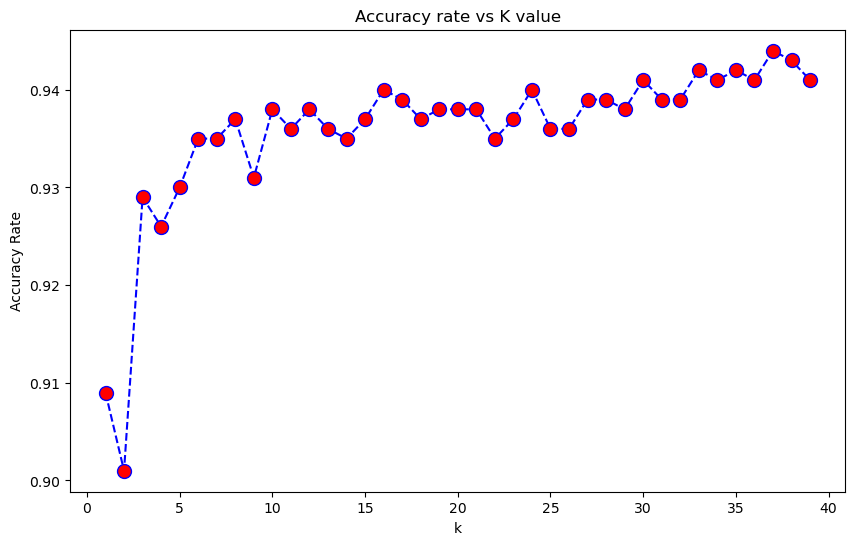

In [23]:
plt.figure(figsize=(10,6))
plt.plot( range(1,40),accuracy_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy rate vs K value')
plt.xlabel('k')
plt.ylabel('Accuracy Rate')

# Look for high consistant accuracy

In [28]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10) # 10 accuracy values ---take their mean
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

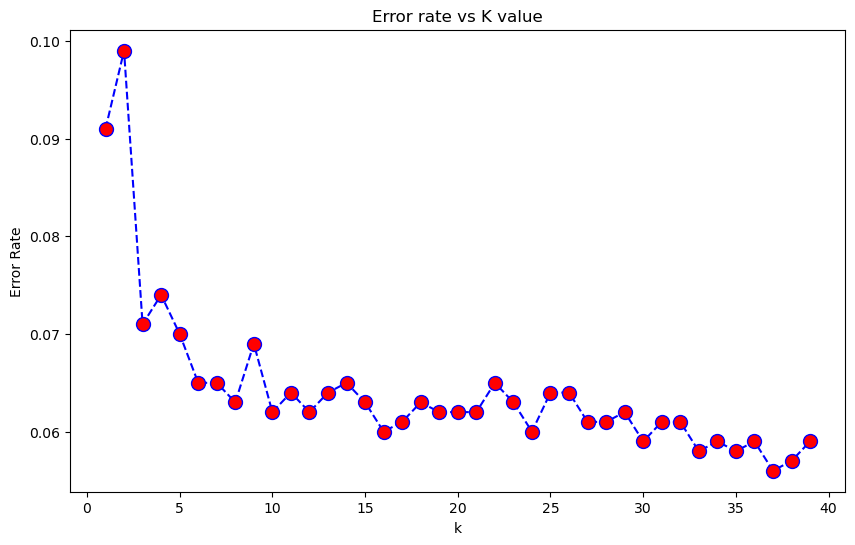

In [30]:
plt.figure(figsize=(10,6))
plt.plot( range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('Error Rate')

# low and consistant error

###### Here we can see that that after around k>20 the error rate just tend to hover
       around 0.06-0.05. Lets retrain the model with that and check the 
    classification report.
Also, in case of accuracy,after around K>20 the accuracy is also almost constant.

In [35]:
# FIRST A QUICK COMPARISION TO OUR ORIGINAL K=3
knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('With k=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With k=3


[[92  6]
 [ 5 97]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.94        98
           1       0.94      0.95      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [36]:
# with k=20,21,22,23
knn=KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('With k=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With k=21


[[94  4]
 [ 5 97]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.95        98
           1       0.96      0.95      0.96       102

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



In [37]:
knn=KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('With k=33')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With k=33


[[93  5]
 [ 7 95]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        98
           1       0.95      0.93      0.94       102

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [38]:
from sklearn.metrics import roc_curve, auc
pred_prob= knn.predict_proba(X_test)[::,1]

fpr,tpr,_=roc_curve(y_test,pred_prob)
auc(fpr,tpr)

0.9900960384153661